# Student Grades Prediction using Python

By using machine learning algorithms, we can predict how well the students are going to perform so that we can help the students whose grades are predicted low. Student Grades Prediction is based on the problem of regression in machine learning.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv("student-mat.csv")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The dataset that I am using for the task of students grade prediction is based on the achievements of the students of the Portuguese schools. 

In this dataset the G1 represents the grades of the first period, 
G2 represents the grades of the second period, 
and G3 represents the final grades. 

Now let’s prepare the data and let’s see how we can predict the final grades of the students:

In [17]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

First selected the necessary columns that we need to train a machine learning model for the task of student grades prediction. Then I declared that the G3 column is our target label and then I split the dataset into 20% testing and 80% training. 

In [18]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [6]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

<AxesSubplot:>

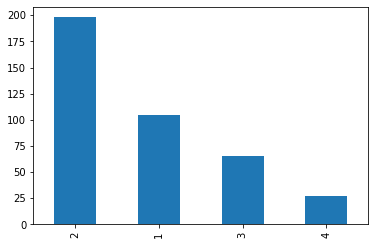

In [9]:
data["studytime"].value_counts().plot.bar()

<AxesSubplot:>

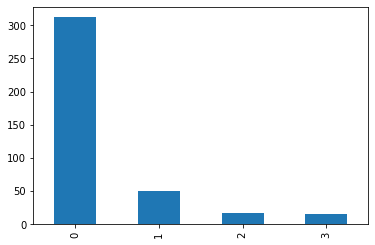

In [10]:
data["failures"].value_counts().plot.bar()

In [12]:
data.isnull().sum()

G1           0
G2           0
G3           0
studytime    0
failures     0
absences     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   studytime  395 non-null    int64
 4   failures   395 non-null    int64
 5   absences   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [14]:
data.describe()

,G1,G2,G3,studytime,failures,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,5.708861
std,3.319195,3.761505,4.581443,0.839240,0.743651,8.003096
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,8.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,75.000000


In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [19]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)

LinearRegression()

In [20]:
accuracy = linear_regression.score(xtest, ytest)
print(accuracy)

0.8365767103576845


The linear regression model gave an accuracy of about 84%

In [22]:
predictions = linear_regression.predict(xtest)
predictions

array([13.89162045, 11.48908562, 12.84117058, 16.37860211, 16.4510664 ,
        8.07276089, 10.32625077, 10.37446547, 12.59172321,  7.79567848,
        6.14760176, 12.62795535,  8.40729914, 11.96047004, 17.04608743,
        9.54202731, 10.77685094,  9.77944444,  9.32444343,  5.72284161,
       18.16070758,  9.1029342 , 12.66418749, 12.41893638,  6.05716364,
        7.00246229, 11.03408461, 18.56749389,  7.00819428,  8.35886822,
       14.41006082,  9.50972051, 10.04224157, 12.53910767, 12.59172321,
       -0.92337202,  4.07686302,  7.80303696,  8.29427012,  7.81552722,
       10.7726985 , -1.07241696,  9.40889027, 10.51499319, 10.54335915,
       13.04672422,  8.34248482, 12.87689503, 12.79428703,  8.06077833,
        9.62437602, 19.89922242, 18.09610947,  8.17359114, 12.86144714,
        8.07276089,  9.27969406, 14.24579121,  4.29581024, 14.04853157,
       12.21727589, 12.76061689, 10.55974256, 17.08231957,  4.77639198,
       15.68621617,  8.95388926, 13.76242424, 18.48651238, 11.12

In [24]:
for i in range(len(predictions)):
    print(predictions[x], xtest[x], [ytest[x]])

[[ 8.07276089 10.32625077 12.84117058 13.89162045 10.32625077]
 [ 8.07276089  8.07276089 12.84117058 13.89162045 16.4510664 ]
 [10.37446547 12.59172321 12.84117058 16.37860211  6.14760176]
 ...
 [ 6.14760176 12.59172321 11.48908562 16.37860211 16.37860211]
 [12.62795535  8.40729914 11.48908562 13.89162045 13.89162045]
 [12.59172321  7.79567848 11.48908562 13.89162045  8.07276089]] [[[ 8  9  2  0  2]
  [11 11  3  0  0]
  [14 12  2  0 20]
  [13 14  1  0  0]
  [11 11  3  0  0]]

 [[ 8  9  2  0  2]
  [ 8  9  2  0  2]
  [14 12  2  0 20]
  [13 14  1  0  0]
  [18 16  3  0  0]]

 [[10 11  2  0  2]
  [12 13  2  0  0]
  [14 12  2  0 20]
  [16 16  1  0  0]
  [ 7  7  1  0  3]]

 ...

 [[ 7  7  1  0  3]
  [12 13  2  0  0]
  [10 12  1  0  2]
  [16 16  1  0  0]
  [16 16  1  0  0]]

 [[13 13  3  0  0]
  [ 9  9  2  2 15]
  [10 12  1  0  2]
  [13 14  1  0  0]
  [13 14  1  0  0]]

 [[12 13  2  0  0]
  [10  8  1  0  6]
  [10 12  1  0  2]
  [13 14  1  0  0]
  [ 8  9  2  0  2]]] [array([[ 8, 10, 13, 14, 10]